In [1]:
import hmm as discreteHMM
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Declear HMM 

In [2]:
hmm = discreteHMM.HMM()

In [ ]:
# Download Data From yahoo 

In [3]:
test_start_date = '2005-06-01'
test_end_date = '2017-06-01'
try: 
    all_data = hist_prices = discreteHMM.parseStockPrices(test_start_date, test_end_date, 'GOOG')
except : 
    print("yahoo error")
assert len(all_data)>0, "Houston, we've got a problem"

[*********************100%***********************]  1 of 1 downloaded


In [ ]:
#Test HMM 

In [5]:
p = 0
profit = [] 
state = [] 
price = [] 
num_correct=0.0
test_window = 6
N=len(all_data)
num_tests=N/test_window
for n in range(1,N-test_window,test_window):
    train_data = all_data[-n:-n-test_window:-1,:]
    hist_moves = discreteHMM.calculateDailyMoves(train_data,1)
    hist_O=np.array(list(map(lambda x: 1 if x>0 else (0 if x<0 else 2), hist_moves)))
    hist_O=hist_O[::-1]
    (a, b, pi_est, alpha_est) = hmm.HMMBaumWelch(hist_O, 2, False, False)
    # print('a', a)
    (path, delta, phi)=hmm.HMMViterbi(a, b, hist_O, pi_est)
    # print('path', path)
    # print('a path', a[int(path[-1]),:])
    prediction_state=np.argmax(a[int(path[-1]),:])
    prediction = np.argmax(b[prediction_state,:])
    
    if ((all_data[-n-test_window-1,1]-all_data[-n-test_window,1])>0 and prediction==1) or ((all_data[-n-test_window-1,1]-all_data[-n-test_window,1])<0 and prediction==0) or ((all_data[-n-test_window-1,1]-all_data[-n-test_window,1])==0 and prediction==2):
        num_correct+=1.0
    
    for i in range(test_window):
        d_return = all_data[n+i][0] - all_data[n+i-1][0]
        p += d_return*prediction_state
        profit.append(p)
        state.append(prediction_state)
        price.append(all_data[n+i][0])
print(num_correct/num_tests)

0.4983454665784249


In [6]:
# Plot Result 

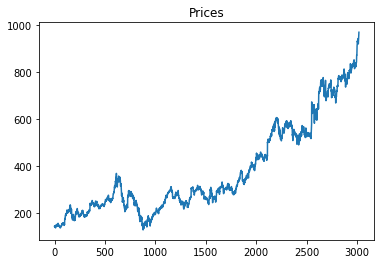

In [8]:
plt.title("Prices")
plt.plot(price)
plt.show()

No handles with labels found to put in legend.


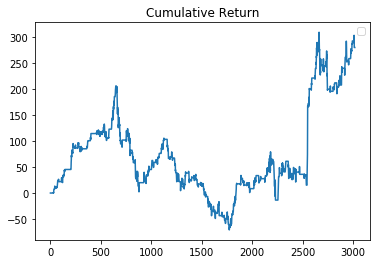

In [9]:
plt.title("Cumulative Return")
plt.plot(profit)
plt.legend()
plt.show()